In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
housing = pd.read_csv('California_Houses.csv')

In [4]:
housing.shape 

(20640, 14)

In [5]:
housing.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [6]:
housing.head(10)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
8,226700.0,2.0804,42,2555,665,1206,595,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584
9,261100.0,3.6912,52,3549,707,1551,714,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


In [7]:
housing.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [8]:
housing.tail(10)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20630,112000.0,3.5673,11,2640,505,1257,445,39.29,-121.32,136708.364048,643689.318276,820939.666498,223007.502691,194318.583164
20631,107200.0,3.5179,15,2655,493,1200,432,39.33,-121.40,139933.692662,650731.247735,828133.395444,225910.101322,194879.139377
20632,115600.0,3.1250,15,2319,416,1047,385,39.26,-121.45,131659.353234,645738.676938,823404.655011,217460.203407,185987.571106
20633,98300.0,2.5495,27,2080,412,1082,382,39.19,-121.53,123269.616426,642052.643562,820038.733106,208634.189749,175914.551803
20634,116800.0,3.7125,28,2332,395,1041,344,39.27,-121.56,132007.832093,651116.939524,829038.801251,217062.320026,182803.303447
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


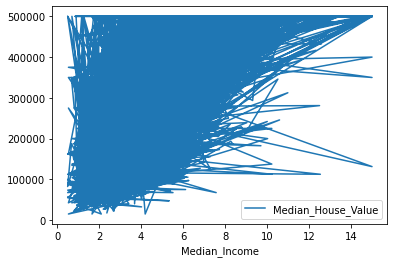

In [10]:
housing.plot("Median_Income", "Median_House_Value")

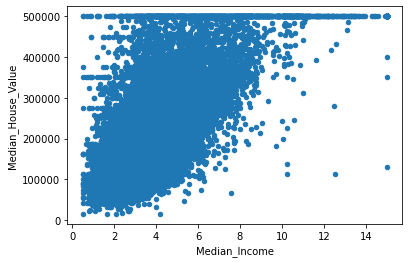

In [11]:
housing.plot.scatter("Median_Income", "Median_House_Value")

In [13]:
x_train, x_test, y_train, y_test = train_test_split(housing.Median_Income, housing.Median_House_Value, test_size = 0.2)

In [14]:
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [15]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [16]:
y_test.head()

11701    218500.0
12731    225700.0
10427    387300.0
2309     108200.0
5302     500001.0
Name: Median_House_Value, dtype: float64

In [17]:
preds

array([306067.21719526, 255950.82159976, 310162.64208913, ...,
       102464.89254342, 212078.47730549, 320472.68504577])

In [18]:
residuals = preds - y_test

(array([  10.,   57.,   80.,  182.,  454., 1209., 1671.,  440.,   22.,
           3.]),
 array([-407366.80910121, -337813.03461488, -268259.26012856,
        -198705.48564224, -129151.71115591,  -59597.93666959,
           9955.83781674,   79509.61230306,  149063.38678938,
         218617.16127571,  288170.93576203]),
 <a list of 10 Patch objects>)

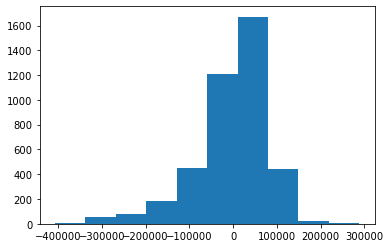

In [19]:
plt.hist(residuals)

In [20]:
mean_squared_error(y_test, preds) ** 0.5


84653.03907407129